**Obesity prediction "Obesity Prediction Dataset: Lifestyle & Health Analysis"**

Sumber Datasets:

[Obesity prediction "Obesity Prediction Dataset: Lifestyle & Health Analysis"](https://www.kaggle.com/datasets/mrsimple07/obesity-prediction?select=obesity_data.csv)



---





**Nama : Maifariza Aulia Dyas**

**NIM  : 2409116032**

**Sistem Informasi A 2024**

---




# Import Library

Data lanjutan dari Checkpoint 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/obesity_data_bersih.csv")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
print("--------------------------------------------------")
print("\nMenampilkan 5 Baris Pertama dan 5 Baris Terakhir:")
print("--------------------------------------------------")
df

--------------------------------------------------

Menampilkan 5 Baris Pertama dan 5 Baris Terakhir:
--------------------------------------------------


,Age,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory,TDEE
0,56,173.575262,71.982051,23.891783,4,Normal weight,95.567130
1,69,164.127306,89.959256,33.395209,2,Obese,66.790419
2,46,168.072202,72.930629,25.817737,4,Overweight,103.270950
3,32,168.459633,84.886912,29.912247,3,Overweight,89.736741
4,60,183.568568,69.038945,20.487903,3,Normal weight,61.463709
...,...,...,...,...,...,...,...
995,18,155.588674,64.103182,26.480345,4,Overweight,105.921378
996,35,165.076490,97.639771,35.830783,1,Obese,35.830783
997,49,156.570956,78.804284,32.146036,1,Obese,32.146036
998,64,164.192222,57.978115,21.505965,4,Normal weight,86.023860


# **Bar Chart: Jumlah Orang per Kategori Obesitas**

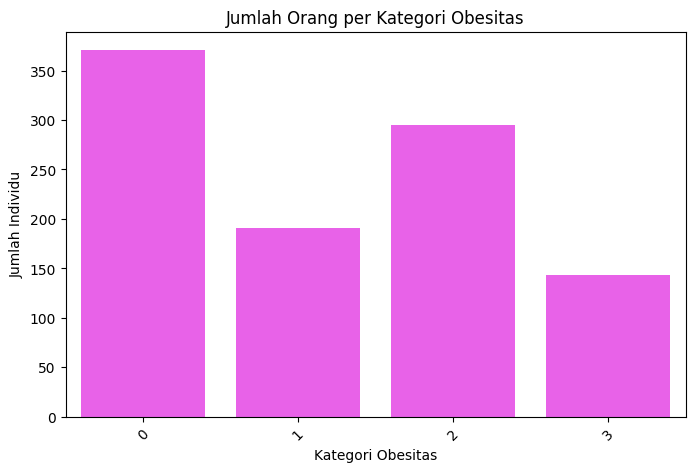

In [48]:
plt.figure(figsize=(8, 5))
sns.countplot(x='ObesityCategory', data=df, color='magenta', alpha=0.7)
plt.title('Jumlah Orang per Kategori Obesitas')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Jumlah Individu')
plt.xticks(rotation=45)
plt.show()

# **Pie Chart: Distribusi Kategori Obesitas dalam Persentase**

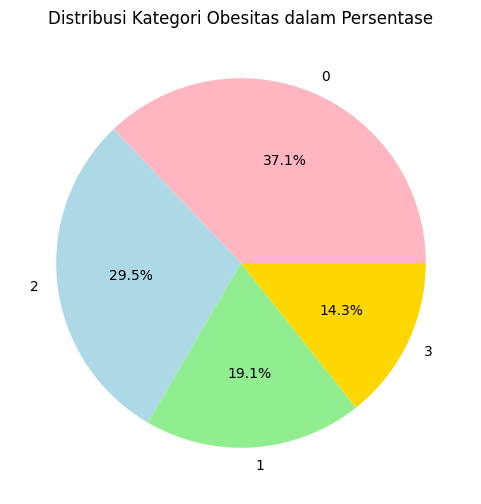

In [37]:
plt.figure(figsize=(6, 6))
plt.pie(df['ObesityCategory'].value_counts(), labels=df['ObesityCategory'].value_counts().index,
        autopct='%1.1f%%', colors=['lightpink', 'lightblue', 'lightgreen', 'gold'])
plt.title('Distribusi Kategori Obesitas dalam Persentase')
plt.show()

# **Histogram: Distribusi BMI dalam Dataset**

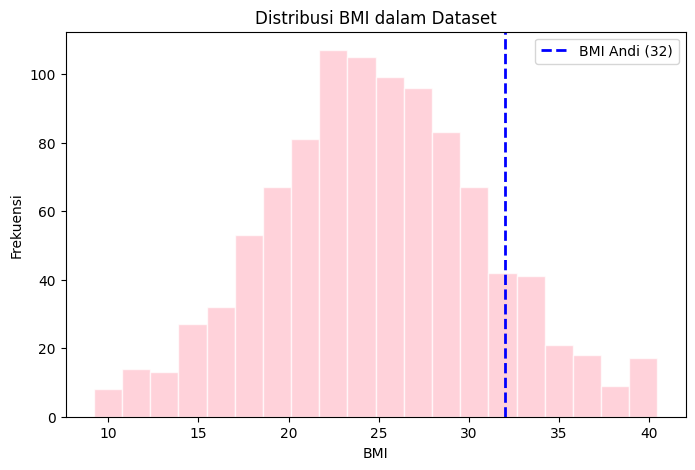

In [17]:
# Histogram (Matplotlib
plt.figure(figsize=(8, 5))
plt.hist(df['BMI'], bins=20, color='pink', edgecolor='white', alpha=0.7)
plt.axvline(x=32, color='blue', linestyle='dashed', linewidth=2, label="BMI Andi (32)")
plt.title('Distribusi BMI dalam Dataset')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()



*   Bentuk histogram menunjukkan bahwa sebagian besar individu memiliki BMI antara 20 hingga 35. Puncak distribusi terjadi sekitar BMI 25-30, yang menunjukkan bahwa mayoritas individu berada dalam kategori berat badan normal hingga obesitas ringan.
*   BMI Andi (32) lebih tinggi dibanding rata-rata populasi dalam dataset, yang sebagian besar berada di kisaran 20-30.




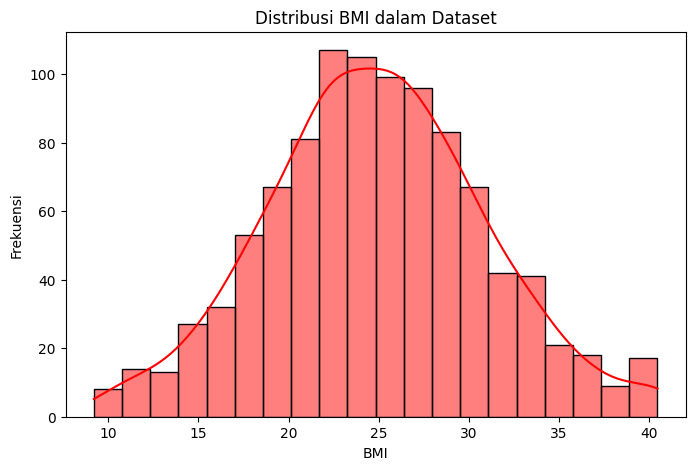

In [18]:
# Histogram (Seaborn)
plt.figure(figsize=(8, 5))
sns.histplot(df['BMI'], bins=20, kde=True, color='red')
plt.title('Distribusi BMI dalam Dataset')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.show()

# **Boxplot: Hubungan BMI dengan Tingkat Aktivitas Fisik**

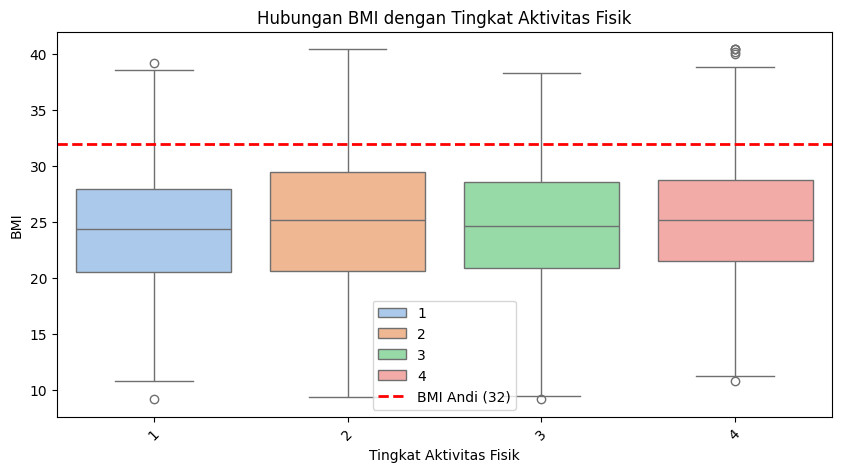

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='PhysicalActivityLevel', y='BMI', hue='PhysicalActivityLevel', data=df, palette='pastel')
bmi_andi = 32
plt.axhline(y=bmi_andi, color='red', linestyle='dashed', linewidth=2, label=f'BMI Andi ({bmi_andi})')
plt.title('Hubungan BMI dengan Tingkat Aktivitas Fisik')
plt.xlabel('Tingkat Aktivitas Fisik')
plt.ylabel('BMI')
plt.legend()
plt.xticks(rotation=45)
plt.show()




*   BMI Andi (32) lebih tinggi dari kebanyakan individu dalam setiap tingkat aktivitas fisik, menunjukkan bahwa aktivitas fisik saja tidak cukup, kemungkinan pola makan juga mempengaruhi BMI Andi.



# **Heatmap: Korelasi Antar Kolom**

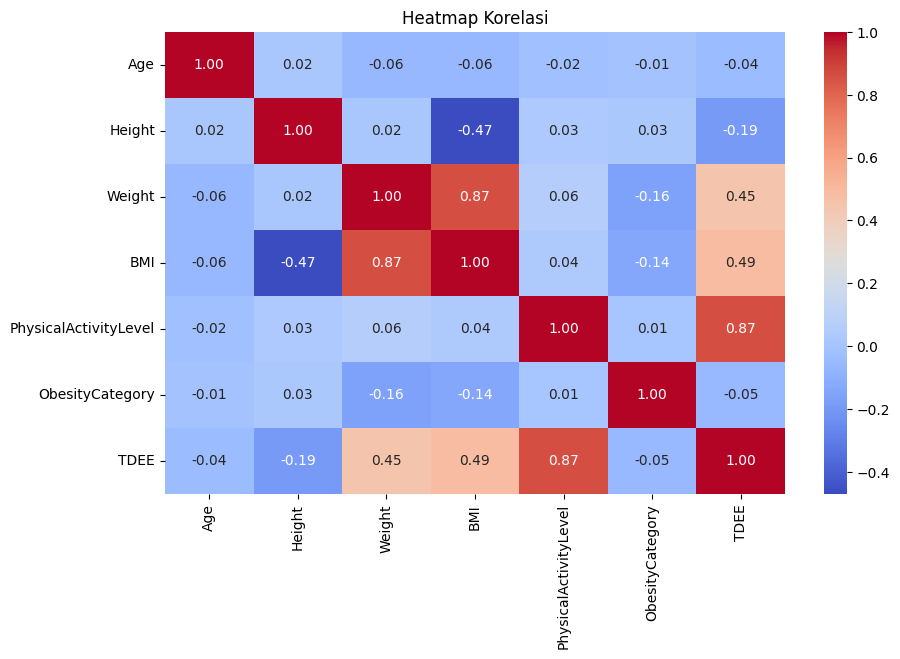

In [21]:
for col in df.select_dtypes(include=['object']).columns:
    df[col], _ = pd.factorize(df[col])

df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi")
plt.show()

kolom_tertentu = "ObesityCategory"

kategori_obesitas = {0: "Under Weight", 1: "Normal Weight", 2: "Overweight", 3: "Obese"}



# **Scatterplot: Hubungan Berat Badan dengan Tinggi Badan Berdasarkan Usia**

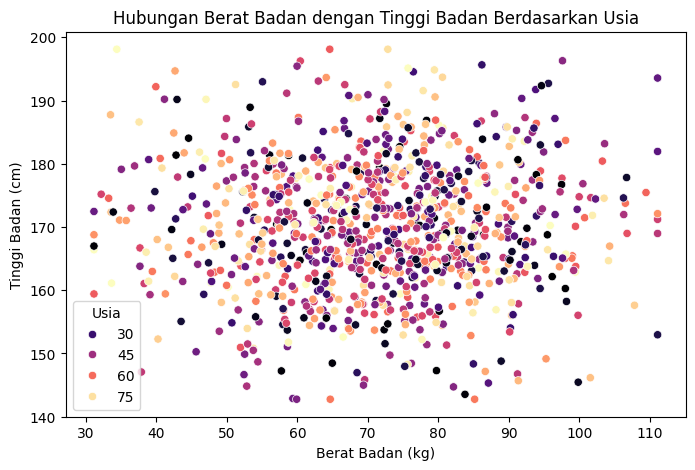

In [28]:
plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(x='Weight', y='Height', hue='Age', data=df, palette='magma')
plt.title('Hubungan Berat Badan dengan Tinggi Badan Berdasarkan Usia')
plt.xlabel('Berat Badan (kg)')
plt.ylabel('Tinggi Badan (cm)')
plt.legend(title='Usia')
plt.show()

# **Scatterplot: Hubungan BMI dengan TDEE berdasarkan Berat Badan**

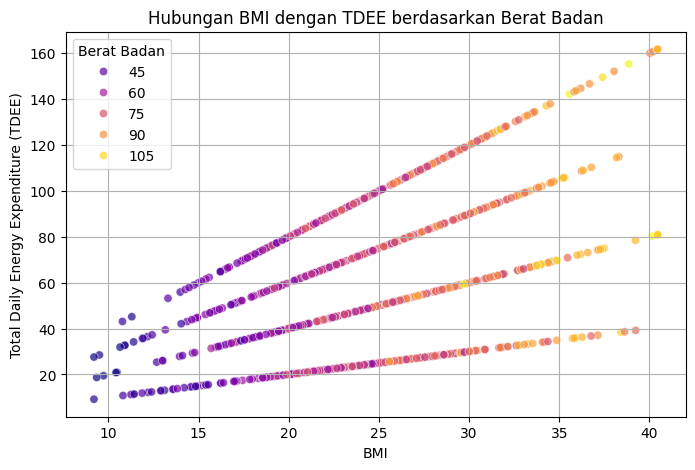

In [42]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='BMI', y='TDEE', hue='Weight', data=df, palette='plasma', alpha=0.7)
plt.title('Hubungan BMI dengan TDEE berdasarkan Berat Badan')
plt.xlabel('BMI')
plt.ylabel('Total Daily Energy Expenditure (TDEE)')
plt.legend(title='Berat Badan')
plt.grid()
plt.show()

# **Bar Chart (Seaborn): Distribusi Kategori Obesitas Berdasarkan Usia**

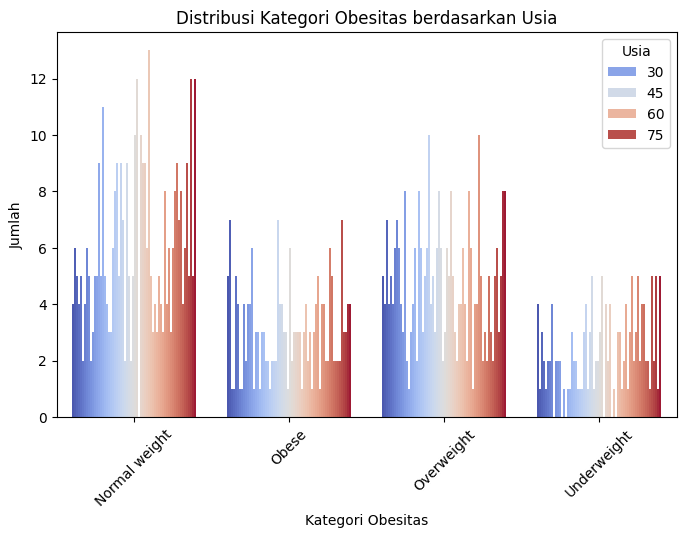

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(x='ObesityCategory', hue='Age', data=df, palette='coolwarm')
plt.title('Distribusi Kategori Obesitas berdasarkan Usia')
plt.xlabel('Kategori Obesitas')
plt.ylabel('Jumlah')
plt.legend(title='Usia')
plt.xticks(rotation=45)
plt.show()

# **Penggunaan groupby untuk Bar Chart**

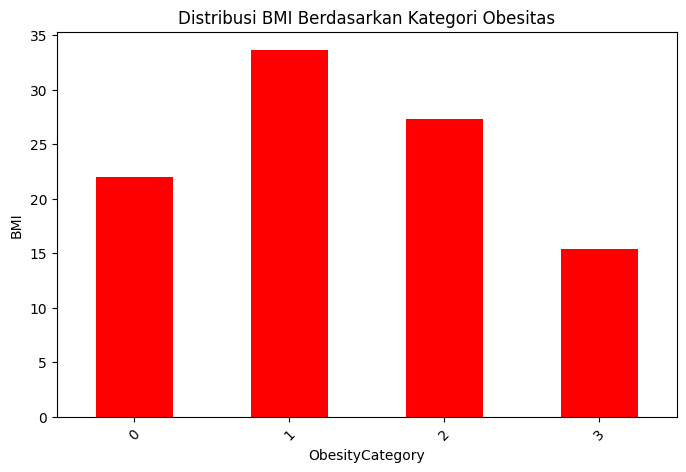

In [49]:
plt.figure(figsize=(8, 5))
df.groupby('ObesityCategory')['BMI'].mean().plot(kind='bar', color='red')
plt.title('Distribusi BMI Berdasarkan Kategori Obesitas')
plt.xlabel('ObesityCategory')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()

# **Line Chart: Simulasi Perubahan BMI Andi selama 6 Bulan**

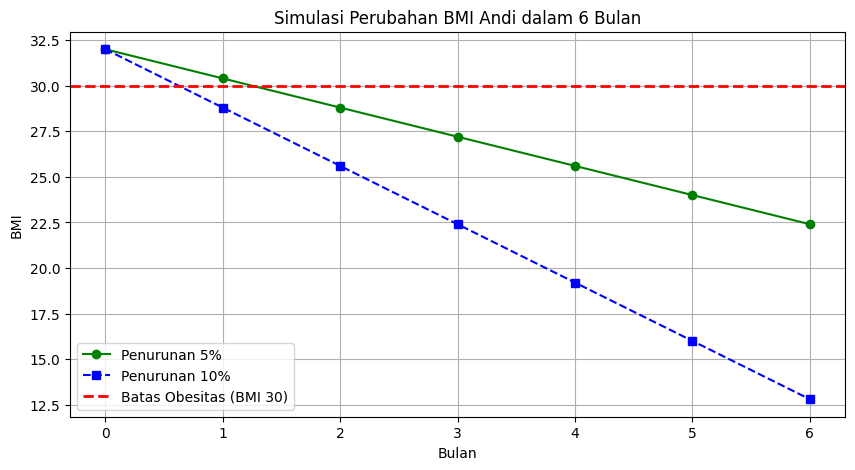

In [35]:
bulan = np.arange(7)
bmi_awal = 32
bmi_5 = bmi_awal * (1 - 0.05 * bulan)
bmi_10 = bmi_awal * (1 - 0.10 * bulan)
bmi_obesitas = 30

plt.figure(figsize=(10, 5))
plt.plot(bulan, bmi_5, marker='o', linestyle='-', color='green', label="Penurunan 5%")
plt.plot(bulan, bmi_10, marker='s', linestyle='dashed', color='blue', label="Penurunan 10%")
plt.axhline(y=bmi_obesitas, color='red', linestyle='dashed', linewidth=2, label="Batas Obesitas (BMI 30)")
plt.title("Simulasi Perubahan BMI Andi dalam 6 Bulan")
plt.xlabel("Bulan")
plt.ylabel("BMI")
plt.legend()
plt.grid()
plt.show()


*   Jika Andi hanya menurunkan BMI sebesar 5% per bulan, maka setelah 6 bulan, Andi masih masuk dalam kategori obesitas (di atas BMI 30)
*   Jika Andi mampu menurunkan BMI sebesar 10% per bulan, maka hanya dalam 3 bulan sudah keluar dari kategori obesitas, dan setelah 6 bulan masuk ke kategori berat badan lebih sehat.

# **Insight dan Tindakan**



```
Insight
```


1.   Individu dengan aktivitas fisik rendah cenderung memiliki BMI yang lebih tinggi dibandingkan mereka yang memiliki aktivitas fisik sedang atau tinggi. Hal ini menunjukkan bahwa kurangnya aktivitas fisik merupakan faktor risiko utama dalam peningkatan berat badan dan obesitas.



2.   Mayoritas individu dalam kategori obesitas memiliki pola makan yang kurang sehat, seperti konsumsi makanan cepat saji dan minuman manis yang berlebihan. Ini menunjukkan bahwa pola makan memainkan peran besar dalam peningkatan berat badan.

3. Histogram menunjukkan bahwa sebagian besar individu memiliki BMI antara 20 hingga 35. Puncak distribusi terjadi sekitar BMI 25-30, menunjukkan bahwa mayoritas individu berada dalam kategori berat badan normal hingga obesitas ringan. BMI Andi (32) lebih tinggi dibanding rata-rata populasi dalam dataset, yang sebagian besar berada di kisaran 20-30.

4. Scatterplot menunjukkan bahwa semakin tinggi BMI seseorang, semakin tinggi juga TDEE-nya, terutama pada individu dengan berat badan lebih besar. Ini berarti bahwa individu dengan BMI lebih tinggi membutuhkan lebih banyak energi untuk aktivitas sehari-hari.

5. Jika Andi hanya menurunkan BMI sebesar 5% per bulan, setelah 6 bulan masih masuk dalam kategori obesitas (di atas BMI 30). Jika mampu menurunkan BMI sebesar 10% per bulan, dalam 3 bulan sudah keluar dari kategori obesitas, dan setelah 6 bulan masuk ke kategori berat badan lebih sehat.




```
Tindakan
```



1.   Mendorong individu untuk meningkatkan aktivitas fisik, seperti berjalan kaki, bersepeda, atau olahraga ringan setiap hari.
2.   Menargetkan penurunan 5-10% berat badan dalam 6 bulan dengan pola makan sehat dan aktivitas fisik.
3. Mengurangi konsumsi makanan cepat saji dan menggantinya dengan makanan tinggi serat serta protein. Dengan meningkatkan asupan buah, sayur, dan air putih untuk membantu pengelolaan berat badan.
4. Menargetkan penurunan 5-10% berat badan dalam 6 bulan dengan kombinasi pola makan sehat dan aktivitas fisik. Dan monitoring secara berkala terhadap perubahan berat badan dan BMI untuk memastikan efektivitas program.
5. Mengedukasi individu mengenai kebutuhan energi harian mereka dan bagaimana mengontrol asupan kalori untuk menjaga berat badan ideal.

